WorkFlow of Image Dataset

1. Dataset Collection
2. Image Processing
3. Resize images to specific dimension
4. convert rgb to grayscale images
5. Train and Test Split
6. Neural Network
7. New Image as input and Trained neural network
8. Model Prediction


In [94]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Load Data

In [95]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

Training Data- 60,000
Test Data-10,000
Image Dimension-28*28

In [96]:
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(10000,)

In [97]:
#print image

print(x_train[50])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  12  56 140 126 175 200  96   2
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  35 166 238 254 246 242 253 246 254  67
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 184 182 146 127  70  30  45  36 215 175
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30   0   0   0   0   0   0   0 207 246
   14   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  5

In [98]:
x_train[50].shape

(28, 28)

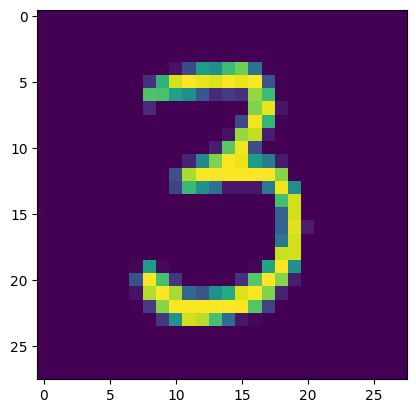

3


In [99]:
#display image
plt.imshow(x_train[50])
plt.show()

#print label
print(y_train[50])

Image Labels

Alternate approach:
we can apply one-hot encoding

In [100]:
#unique values in Y_train
print(np.unique(y_train))
#unique values in Y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [101]:
#scaling the values between 0-1
x_train = x_train/255
x_test = x_test/255

In [102]:
print(x_train[50])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Build Neural Network

In [103]:
#setting layers for neural network
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid'),

])

Compile Model

In [104]:
#compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

Train Model

In [105]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2939 - accuracy: 0.9154
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1401 - accuracy: 0.9583
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1047 - accuracy: 0.9683
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0852 - accuracy: 0.9743
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0697 - accuracy: 0.9789
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0594 - accuracy: 0.9809
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0521 - accuracy: 0.9831
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0444 - accuracy: 0.9860
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0389 - accuracy: 0.9872
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.035

Train data accuracy-98.90%

Accuracy for Test Data

In [106]:
loss,accuracy=model.evaluate(x_test,y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1025 - accuracy: 0.9747
0.9746999740600586


Test Data- 97.4%

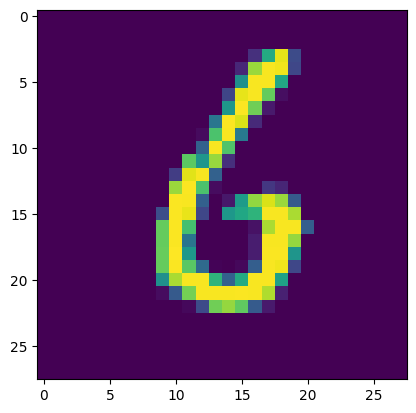

6


In [107]:
plt.imshow(x_test[50])
plt.show()
print(y_test[50])

In [108]:
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [109]:
print(y_pred[0])

[1.3956530e-01 6.3463522e-05 8.3699155e-01 9.8974669e-01 7.5172323e-07
 5.3042822e-06 4.9987802e-11 9.9999917e-01 1.0156471e-01 4.0712047e-01]


model.predict gives prediction probablity to each class for that datapoint

In [110]:
#converting prediction to class label
label_first_image=np.argmax(y_pred[0])
print(label_first_image)

7


In [111]:
#Converting prediction probablity for class label for all test data points
y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Build Confusion Matrix

In [112]:
conf_mat=confusion_matrix(y_test,y_pred_labels)

In [113]:
print(conf_mat)

tf.Tensor(
[[ 971    0    1    1    0    2    2    2    1    0]
 [   0 1124    3    3    0    1    1    0    3    0]
 [   3    0 1012    3    2    0    1    5    5    1]
 [   0    0    6  976    0   13    0    6    2    7]
 [   2    1    3    1  942    5    4    3    1   20]
 [   2    0    0    5    3  877    1    0    2    2]
 [   4    2    2    1    5   13  927    0    4    0]
 [   2    6    8    1    0    0    0 1006    0    5]
 [   3    1    4    6    3   12    1    6  933    5]
 [   1    3    1    3    6    7    1    5    3  979]], shape=(10, 10), dtype=int32)


Text(158.22222222222223, 0.5, 'Truth')

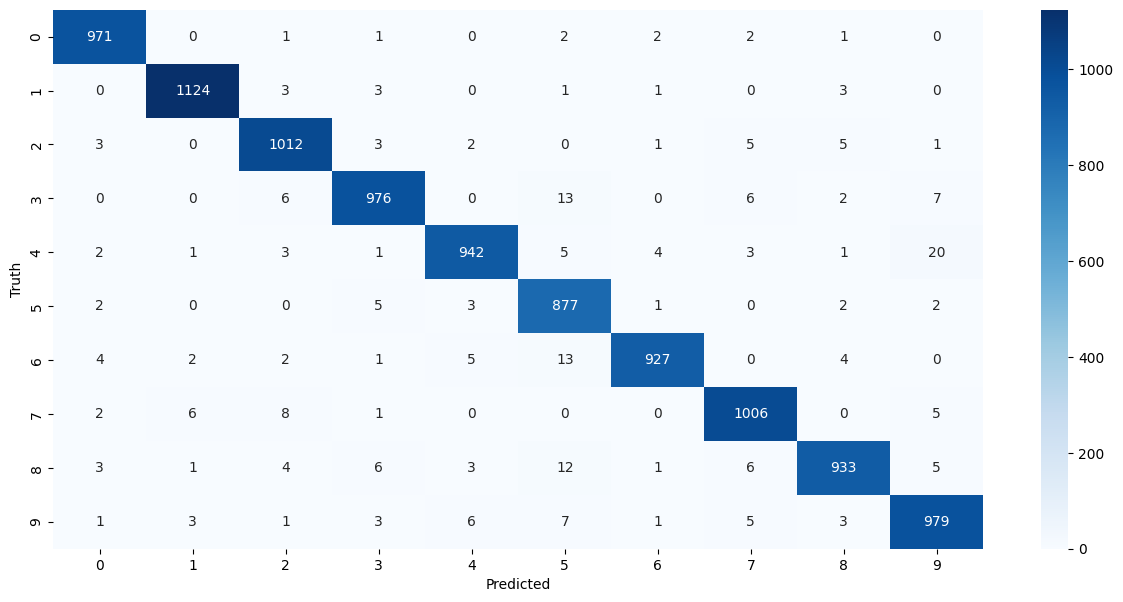

In [114]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Build a Predictive System

In [115]:
input_image_path='test1.png'
input_image=cv2.imread(input_image_path)

In [116]:
type(input_image)

numpy.ndarray

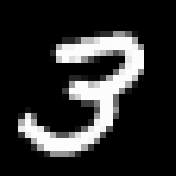

In [117]:
cv2_imshow(input_image)

In [118]:
input_image.shape

(176, 176, 3)

In [119]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [120]:
grayscale.shape

(176, 176)

In [121]:
input_image_resize=cv2.resize(grayscale,(28,28))

In [122]:
cv2_imshow(input_image_resize)

In [123]:
#Scaling the values
input_image_resize=input_image_resize/255


In [124]:
image_reshaped=np.reshape(input_image_resize,(1,28,28))

In [125]:
input_prediction=model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 30ms/step
[[3.1430081e-10 5.1462278e-03 1.6841672e-03 1.0000000e+00 1.0257291e-08
  4.6032229e-01 5.2099408e-14 4.6934437e-02 5.1165195e-03 9.7449797e-01]]


In [126]:
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

3


Predicitive System

In [129]:
input_image_path= input('Image Path: ')
input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
input_image_resize=input_image_resize/255
image_reshaped=np.reshape(input_image_resize,(1,28,28))
input_prediction=model.predict(image_reshaped)
input_pred_label=np.argmax(input_prediction)
print("Handwritten Digit: ",input_pred_label)